In [13]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install openpyxl

In [15]:
file_path = 'airbnb.xlsx'

df = pd.read_excel(file_path)

df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaT,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaT,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaT,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [16]:
df.isnull().sum()

Host Id                          0
Host Since                       3
Name                             0
Neighbourhood                    0
Property Type                    3
Review Scores Rating (bin)    8323
Room Type                        0
Zipcode                        134
Beds                            85
Number of Records                0
Number Of Reviews                0
Price                            0
Review Scores Rating          8323
dtype: int64

In [17]:
df_cleaned = df.dropna()

df_cleaned = df.dropna(axis=1)

df_cleaned = df.dropna()

df_cleaned.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
4,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
5,1039,2008-07-25,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149,100.0
6,1783,2008-08-12,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250,100.0
7,2078,2008-08-15,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90,94.0
8,2339,2008-08-20,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,90.0,Entire home/apt,10009.0,2.0,1,95,270,90.0


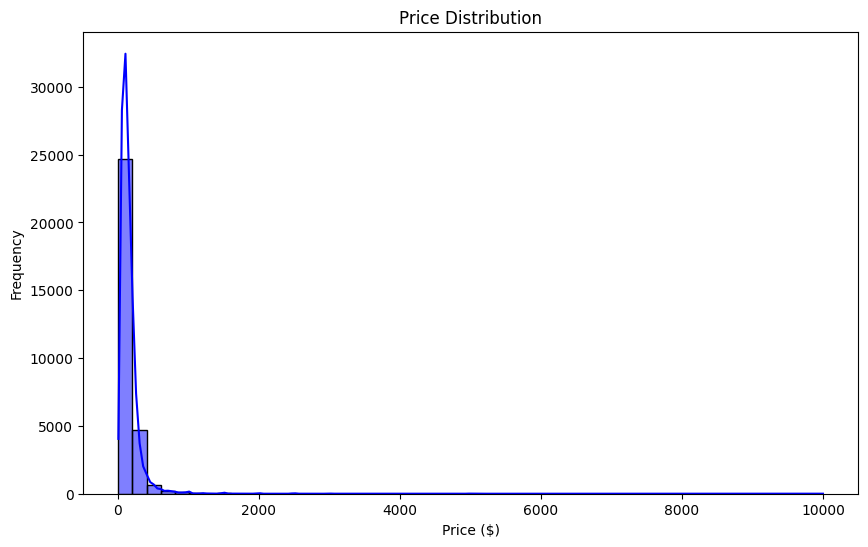

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

Pearson Correlation Coefficient: 0.029578501325886727


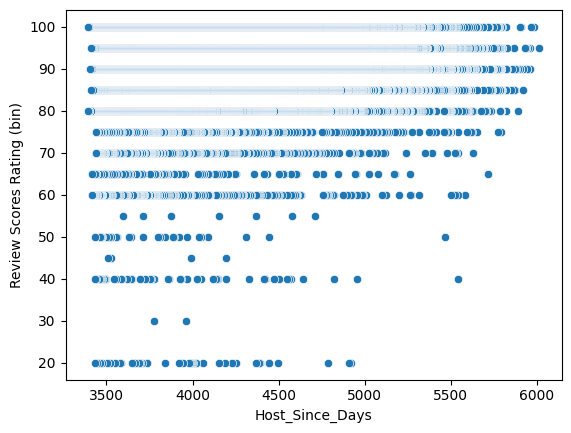

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df['Host_Since_Days'] = (pd.to_datetime('today') - pd.to_datetime(df['Host Since'])).dt.days

correlation_coefficient = df['Host_Since_Days'].corr(df['Review Scores Rating (bin)'])
print("Pearson Correlation Coefficient:", correlation_coefficient)

sns.scatterplot(x='Host_Since_Days', y='Review Scores Rating (bin)', data=df)
plt.show()

In [20]:
print(df.columns)

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating', 'Host_Since_Days'],
      dtype='object')


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

df = pd.get_dummies(df, columns=['Neighbourhood ', 'Property Type', 'Room Type'])

X = df[['Neighbourhood _Bronx', 'Neighbourhood _Brooklyn', 'Neighbourhood _Manhattan', 'Neighbourhood _Queens', 'Neighbourhood _Staten Island',
        'Property Type_Apartment', 'Property Type_House', 'Property Type_Other',
        'Room Type_Entire home/apt', 'Room Type_Private room', 'Room Type_Shared room',
        'Beds', 'Zipcode']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 34166.82251019553
